In [1]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"

In [2]:
with open("time_complexity_stats.json", "r") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)
df.columns = [
    "Levenshtein (CDR3 only)",
    "tcrdist",
    "SCEPTR (CPU)",
    "SCEPTR (GPU)",
    "SCEPTR (CPU, KD Tree)",
    "SCEPTR (GPU, KD Tree)"
]

In [4]:
settings = {
    "Levenshtein (CDR3 only)": {
        "linestyle": "-",
        "color": "C0"
    },
    "tcrdist": {
        "linestyle": "-",
        "color": "C2"
    },
    "SCEPTR (CPU)": {
        "linestyle": "-",
        "color": "C3"
    },
    "SCEPTR (GPU)": {
        "linestyle": "--",
        "color": "C3"
    },
    "SCEPTR (CPU, KD Tree)": {
        "linestyle": "-",
        "color": "C4"
    },
    "SCEPTR (GPU, KD Tree)": {
        "linestyle": "--",
        "color": "C4"
    },
}

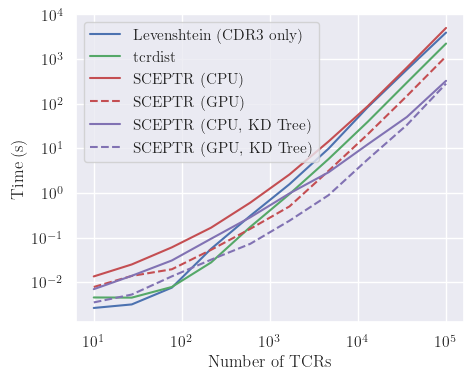

In [7]:
plt.figure(figsize=(5,4))

for column in df:
    plt.plot(df.index.astype(int), df[column], **settings[column], label=column)

plt.xlabel("Number of TCRs")
plt.ylabel("Time (s)")

plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.savefig("time_complexity_benchmarking.pdf", dpi=300, bbox_inches="tight")